In [1]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
DIR = './data/'

In [2]:
def get_data(directories,years): 
    return pd.concat(
        map(lambda x: pd.read_csv(
            f'{directories}yob{x}.txt',
            header=None,
            names=['Name','Gender','Quantity']
        ).assign(Year=x),
            years)
    ).reset_index(drop=True)

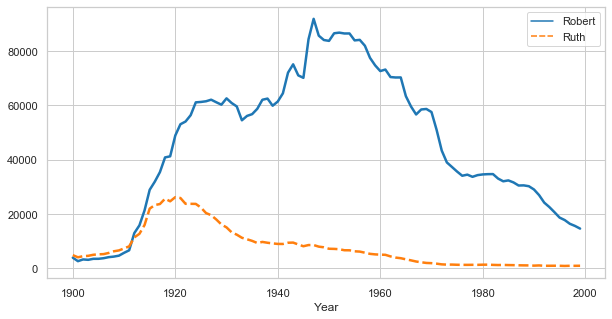

In [301]:
df = get_data(DIR,range(1900,2000))
name_dinamics = df[(df['Name'] == 'Ruth') | (df['Name'] == 'Robert')].groupby(['Name','Year']).sum().unstack('Name')
sns.set(style="whitegrid")
sns.lineplot(data=name_dinamics['Quantity'], palette="tab10", linewidth=2.5)

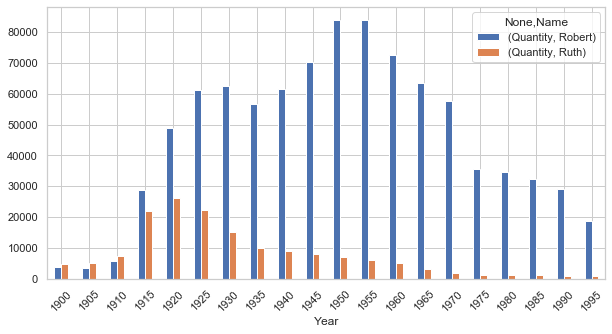

In [5]:
name_dinamics.filter(regex='0$|5$',axis=0).plot(kind='bar', rot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDB3913F08>],
      dtype=object)

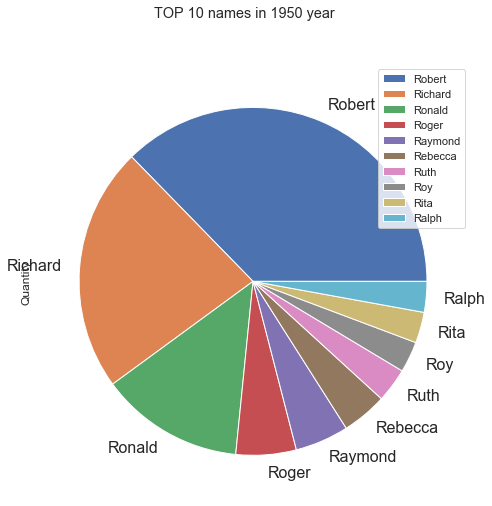

In [7]:
df2 = get_data(DIR,[1950])[['Quantity','Name']].set_index('Name').filter(regex='^R', axis=0).sort_values('Quantity',ascending=None)[:10]
df2.plot(kind='pie',subplots=True, title='TOP 10 names in 1950 year',figsize=(10,8),fontsize=16)

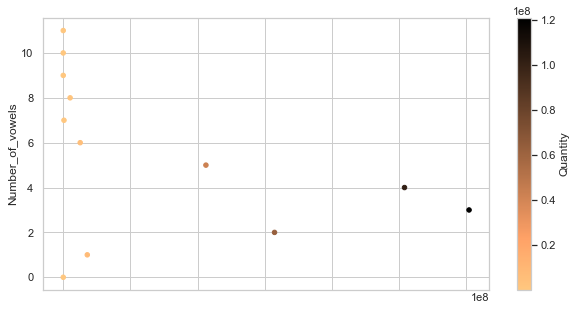

In [303]:
df3 = get_data(DIR,range(1900,2018))[['Name','Quantity']]
df3['Number_of_vowels'] = df3['Name'].map(lambda x: sum(1 for s in x.lower() if s in 'qwrtplkjhgfdszxcvbnm'))
df3[['Quantity','Number_of_vowels']].groupby('Number_of_vowels').sum().reset_index().plot(kind='scatter', y='Number_of_vowels',x='Quantity',c='Quantity',colormap='copper_r',grid=True,marker='o')

